In [151]:
"""
July 22, 2020

Comparing parameter results of MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.patches import Rectangle
import itertools

In [153]:
params = \
['pq_func_par0[0]',
    'pq_func_par2[0]', 

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]',
     
    'pq_func_par0[0]_err',
    'pq_func_par2[0]_err', 

    #norm
    'pq_func_par0[1]_err',
    'pq_func_par2[1]_err', 

    #gamma
    'pq_func_par0[2]_err',
    'pq_func_par2[2]_err', 

    #peak mass
    'pq_func_par0[3]_err',
    'pq_func_par2[3]_err' 
]

labels = \
{
    'pq_func_par0[0]': 'beta_0',
    'pq_func_par2[0]': 'beta_1', 

    #norm
    'pq_func_par0[1]': 'N_0',
    'pq_func_par2[1]': 'nu', 

    #gamma
    'pq_func_par0[2]': 'gamma_0',
    'pq_func_par2[2]': 'gamma_1', 

    #peak mass
    'pq_func_par0[3]': 'logM_0',
    'pq_func_par2[3]': 'mu', 
}

In [63]:
def getData(text):
    results = np.loadtxt(text, delimiter=',')
    runs = int(len(results)/9)

    results = np.reshape(results, (runs, 9, 3))
    
    #make a dictionary for easy access
    resDict = {}

    for e in results:
        
        pars_update = {}

        resDict[str(e[0][0])] = {}

        resDict[str(e[0][0])]['zLow'] = e[0][1]
        resDict[str(e[0][0])]['zHigh'] = e[0][2]

        for i in range(1, 9):
            resDict[str(e[0][0])][params[i-1]] = e[i][0]
            pars_update[params[i-1]] = e[i][0]
        for i in range(1, 9):
            resDict[str(e[0][0])][params[i+7]] = e[i][1:]
            
        #and a galaxyHOD object for plotting
        pars = ares.util.ParameterBundle("emma:model1")

        pars.update(pars_update)
        
        resDict[str(e[0][0])]["pop"] = ares.populations.GalaxyPopulation(**pars)
            
    return resDict

In [173]:
colors = ['blue', 'orange', 'teal', 'darkgreen', 'purple', 'cyan', 'crimson', 'violet']

pars = ares.util.ParameterBundle("emma:model1")
popPaper = ares.populations.GalaxyPopulation(**pars)

def plotSMF(DataD, z):
    pl.figure(figsize=(8, 5))
    Ms = np.linspace(7, 12, 80)

    obslf = ares.analysis.GalaxyPopulation()
    ax = obslf.PlotSMF(z=z, round_z=0.2, log10Mass=True)

    for i, e in enumerate(DataD):

        smf = DataD[e]['pop'].StellarMassFunction(z, Ms)
        Zrange ="{0}-{1}".format(DataD[e]['zLow'], DataD[e]['zHigh'])

        ax.semilogy(Ms, smf, label=Zrange, color=colors[i])

    pl.title("z = %.2f" %z)
    pl.legend()
    # pl.ylim(1e-15, 1e2)
    pl.show()
    
def plotParams(DataD, err=True, paper=True):
    #don't trust error bars here as the signs are weird so I just abs. them all

    fig, axs = pl.subplots(2, 4, figsize=(16, 10))

    for i, ax in enumerate(axs.flat):
        for j, e in enumerate(DataD): 
            ax.hlines(y=DataD[e][params[i]], xmin=DataD[e]['zLow'], xmax=DataD[e]['zHigh'], color=colors[j])

    #         print(DataD[e]['zLow'], DataD[e]['zHigh'], DataD[e][params[i]])
    #         ax.axhspan(ymin=DataD[e][params[i]]-DataD[e][params[i+8]][0], ymax=DataD[e][params[i]]+DataD[e][params[i+8]][1], xmin=testData[e]['zLow'],\
    #                    xmax=DataD[e]['zHigh'], alpha=0.2, color=colors[j])

    #         print(DataD[e][params[i]]-np.abs(DataD[e][params[i+8]][0]), np.abs(DataD[e][params[i+8]][1])-np.abs(DataD[e][params[i+8]][0]))
    #         print(DataD[e][params[i+8]][0], DataD[e][params[i+8]][1])

            if err:
                rect = Rectangle((DataD[e]['zLow'], DataD[e][params[i]]-np.abs(DataD[e][params[i+8]][0])), 
                                 width=DataD[e]['zHigh']-DataD[e]['zLow'], 
                                 height=np.abs(DataD[e][params[i+8]][1])+np.abs(DataD[e][params[i+8]][0]), color=colors[j], alpha=0.2)
                ax.add_patch(rect)

            ax.set_title(labels[params[i]])
            
            if paper:
                ax.hlines(y=pars[params[i]], xmin=0, xmax=3.5, color='black', ls="--")
                

        ax.set(xlabel='z')#, ylabel='Val')
        ax.set_xlim(0, 4)
    pl.show()
    

In [171]:
text = "CedarScripts/testingP.txt"

testData = getData(text)

In [ ]:
plotSMF(testData, 4.0)

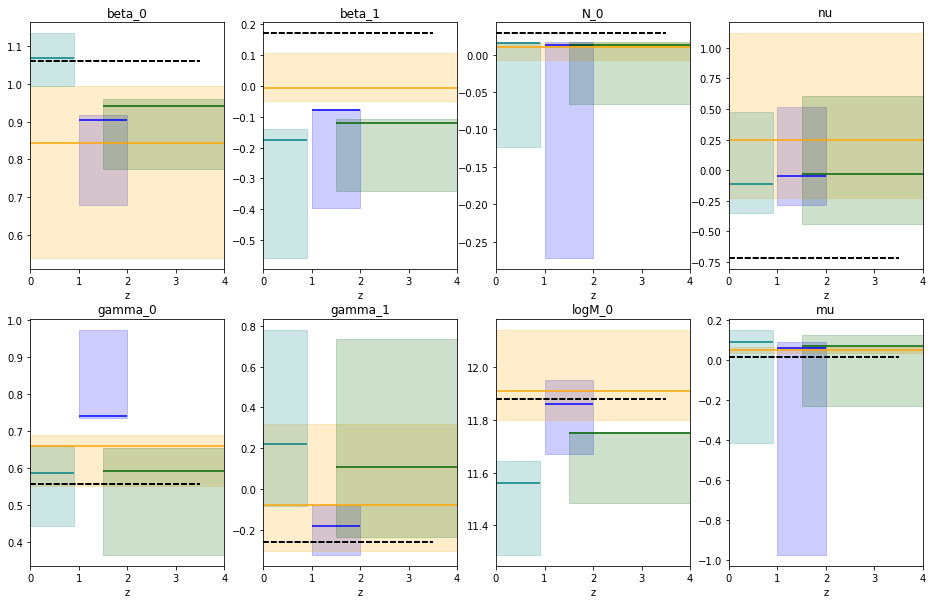

In [174]:
plotParams(testData, err=True)